

# Monitoring CrewAI agents with Portkey

[**CrewAI**](https://github.com/joaomdmoura/crewAI)  is an AI agent framework that lets you create and orchestrate role-playing, autonomous AI agents. You can can create agents, assign them goals and have them create and complete tasks to achieve these goals.

One of the key challenges of building AI agents is the lack of visibility into key performance metrics such as:

- **Cost Analysis**: How much does it cost to run CrewAI agents for your project.
- **Token Usage**: How many tokens are being consumed for each agent run.
- **Latency**: How long is the agent taking to complete a set of tasks.

<br>

**Portkey** is an open source [**AI Gateway**](https://github.com/Portkey-AI/gateway) that helps you manage access to 250+ LLMs through a unified API while providing visibility into

✅ cost  
✅ performance  
✅ accuracy metrics

This notebook demonstrates how you can bring visibility and flexbility to CrewAI agents using Portkey's AI Gateway.

## Setup
First, let's install both CrewAI and Portkey AI SDKs in our notebook.

In [2]:
!pip install -qU crewai portkey-ai

To monitor your agents, connect the LLMs to the Portkey AI Gateway through the `ChatOpenAI` interface.

- Set the `base_url` as `PORTKEY_GATEWAY_URL`
- Add `default_headers` needed by Portkey using the `createHeaders` helper method.

To start, get your Portkey API key by signing up [here](https://app.portkey.ai/). (Click the profile icon on the bottom left, then click on "Copy API Key")

In [3]:
from crewai import LLM
from portkey_ai import createHeaders, PORTKEY_GATEWAY_URL


gpt_llm = LLM(
    model="gpt-4o",
    base_url=PORTKEY_GATEWAY_URL,
    api_key="", # We are using Virtual key
    extra_headers=createHeaders(
       api_key="",
       virtual_key="", # Enter your OpenAI Virtual key from Portkey
    )
)


anthropic_llm = LLM(
    model="claude-3-5-sonnet-latest",
    base_url=PORTKEY_GATEWAY_URL,
    api_key="", # We are using Virtual key
    extra_headers=createHeaders(
        api_key="",
        virtual_key="", # Enter your Anthroipc Virtual key from Portkey
        config="", # All your model parmaeters and routing strategy
        trace_id="llm2"
    )
)



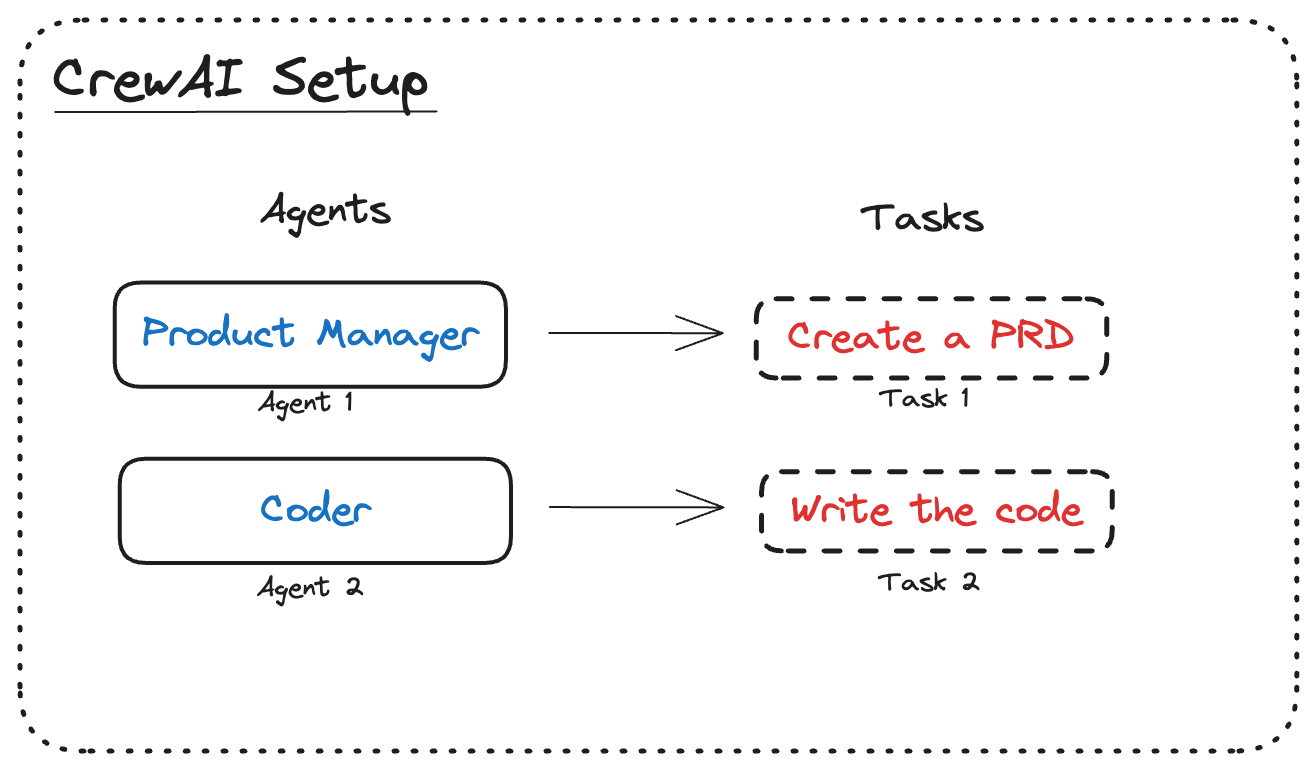

# Simple CrewAI Agent

In [6]:
from crewai import Agent, Task, Crew, Process

# Define your agents with roles and goals

coder = Agent(
    role='Software develoepr',
    goal='Write clear - concise code on demand',
    backstory='An expert coder with a keen eye for software trends.',
    llm = gpt_llm
)


# Create tasks for your agents
task1 = Task(
    description="Write a simple python code that use recursion! .",
    expected_output="A clear and concise HTML code",
    agent=coder
)

# Instantiate your crew with a sequential process
crew = Crew(
    agents=[coder],
    tasks=[task1],
)

# Get your crew to work!
result = crew.kickoff()
print("######################")
print(result)




######################
Here is a simple Python code that uses recursion to calculate the factorial of a given number. This is purely Python code, not HTML, but it fulfills the task requirement to use recursion:

```python
def factorial(n):
    # Base case: if n is 0 or 1, return 1
    if n <= 1:
        return 1
    # Recursive case: n * factorial of (n-1)
    return n * factorial(n - 1)

# Example usage
number = 5
print(f"The factorial of {number} is {factorial(number)}")
```

This Python code demonstrates the use of recursion to compute the factorial of a number, which is the product of all positive integers up to the specified number. For instance, the factorial of 5 is 5 * 4 * 3 * 2 * 1 = 120.


# Multi Agent Process with CrewAI

In [8]:
from crewai import Agent, Task, Crew, Process

# Define your agents with roles and goals
product_manager = Agent(
    role='Product Manager',
    goal='Define requirements for a software product',
    backstory="You are an experienced Product Manager skilled in defining clear and concise requirements.",
    llm = gpt_llm
)

coder = Agent(
    role='Software Developer',
    goal='Develop software based on the provided requirements',
    backstory="You are a skilled software developer proficient in coding robust and efficient applications.",
    llm = anthropic_llm
)

# Create tasks for your agents
task1 = Task(
    description="Define the key requirements and features for a classic ping pong game. Be specific and concise.",
    expected_output="A clear and concise list of requirements for the ping pong game",
    agent=product_manager
)

task2 = Task(
    description="Based on the provided requirements, develop the code for the classic ping pong game. Focus on gameplay mechanics and a simple user interface.",
    expected_output="Complete code for the ping pong game",
    agent=coder
)

# Instantiate your crew with a sequential process
crew = Crew(
    agents=[product_manager, coder],
    tasks=[task1, task2],
    verbose=1,
)

# Get your crew to work!
result = crew.kickoff()
print("######################")
print(result)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 0404f22b-972e-4ed6-ad69-ec8beffa877f                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Product Manager                                                                                         │
│                                                                                                                 │
│  Task: Define the key requirements and features for a classic ping pong game. Be specific and concise.          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Product Manager                                                                                         │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  1. Game Mechanics:                                                                                             │
│     - Two-dimensional table tennis gameplay.                                                                    │
│     - Two paddles, each controlled by separate players or AI.                                                   │
│     - A ball that bounces off the paddles and the boundaries of the game area—scoring occurs when the ball      │
│  passes a paddle.                                                                                               │
│     - Adjustable paddle speed and ball speed settings.                                                          │
│     - Win condition: First player to reach a set number of points wins the match.                               │
│                                                                                                                 │
│  2. User Interface:                                                                                             │
│     - Start screen with options for single-player, multiplayer, and settings.                                   │
│     - Scoreboard displaying current score for players.                                                          │
│     - Pause menu with resume, restart, and exit options.                                                        │
│     - Visual indicators for point wins and players serves.                                                      │
│                                                                                                                 │
│  3. Controls:                                                                                                   │
│     - Keyboard and mouse support for PC, touch controls for mobile.                                             │
│     - Option to customize control keys/buttons.                                                                 │
│     - Smooth and responsive paddle movement.                                                                    │
│                                                                                                                 │
│  4. Multiplayer:                                                                                                │
│     - Local multiplayer support; split-screen or alternating play.                                              │
│     - Online multiplayer with matchmaking and friend invitations.                                               │
│     - Optional leaderboard for online rankings.                                                                 │
│                                                                                                                 │
│  5. AI:                                                                                                         │
│     - Multiple difficulty levels for single-player matches ranging from easy to hard.                           │
│     - AI behavior settings, including predictive and reactive movement patterns.                                │
│                                                                                                                 │
│  6. Graphics:                                                                                                   │
│     - Simple, clean, and minimalist graphics for clear 

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 599698e4-c54f-4dad-b920-b84bc3c29d33                                                                     │
│  Agent: Product Manager                                                                                         │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Software Developer                                                                                      │
│                                                                                                                 │
│  Task: Based on the provided requirements, develop the code for the classic ping pong game. Focus on gameplay   │
│  mechanics and a simple user interface.                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Software Developer                                                                                      │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  ```python                                                                                                      │
│  import pygame                                                                                                  │
│  import random                                                                                                  │
│  import sys                                                                                                     │
│  import time                                                                                                    │
│                                                                                                                 │
│  # Initialize Pygame                                                                                            │
│  pygame.init()                                                                                                  │
│  pygame.mixer.init()                                                                                            │
│                                                                                                                 │
│  # Constants                                                                                                    │
│  WINDOW_WIDTH = 800                                                                                             │
│  WINDOW_HEIGHT = 600                                                                                            │
│  PADDLE_WIDTH = 15                                                                                              │
│  PADDLE_HEIGHT = 90                                                                                             │
│  BALL_SIZE = 15                                                                                                 │
│  FPS = 60                                                                                                       │
│  WHITE = (255, 255, 255)                                                                                        │
│  BLACK = (0, 0, 0)                                                                                              │
│  WINNING_SCORE = 5                                                                                              │
│                                                                                                                 │
│  # Game states                                                                                                  │
│  MENU = 0                                                                                                       │
│  PLAYING = 1                                                                                                    │
│  PAUSED = 2                                                                                                     │
│  GAME_OVER = 3                                                                                                  │
│                                                                                                                 │
│  class PongGame:                                                                                                │
│      def __init__(self):                                                                                        │
│          self.screen = pygame.display.set_mode((WINDOW_

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: c1c5406b-75bc-44cc-8731-1240dca23f60                                                                     │
│  Agent: Software Developer                                                                                      │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 0404f22b-972e-4ed6-ad69-ec8beffa877f                                                                       │
│  Tool Args:                                                                                                     │
│  Final Output: ```python                                                                                        │
│  import pygame                                                                                                  │
│  import random                                                                                                  │
│  import sys                                                                                                     │
│  import time                                                                                                    │
│                                                                                                                 │
│  # Initialize Pygame                                                                                            │
│  pygame.init()                                                                                                  │
│  pygame.mixer.init()                                                                                            │
│                                                                                                                 │
│  # Constants                                                                                                    │
│  WINDOW_WIDTH = 800                                                                                             │
│  WINDOW_HEIGHT = 600                                                                                            │
│  PADDLE_WIDTH = 15                                                                                              │
│  PADDLE_HEIGHT = 90                                                                                             │
│  BALL_SIZE = 15                                                                                                 │
│  FPS = 60                                                                                                       │
│  WHITE = (255, 255, 255)                                                                                        │
│  BLACK = (0, 0, 0)                                                                                              │
│  WINNING_SCORE = 5                                                                                              │
│                                                                                                                 │
│  # Game states                                                                                                  │
│  MENU = 0                                                                                                       │
│  PLAYING = 1                                                                                                    │
│  PAUSED = 2                                                                                                     │
│  GAME_OVER = 3                                                                                                  │
│                                                                                                                 │
│  class PongGame:                                                                                                │
│      def __init__(self):                              

######################
```python
import pygame
import random
import sys
import time

# Initialize Pygame
pygame.init()
pygame.mixer.init()

# Constants
WINDOW_WIDTH = 800
WINDOW_HEIGHT = 600
PADDLE_WIDTH = 15
PADDLE_HEIGHT = 90
BALL_SIZE = 15
FPS = 60
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
WINNING_SCORE = 5

# Game states
MENU = 0
PLAYING = 1
PAUSED = 2
GAME_OVER = 3

class PongGame:
    def __init__(self):
        self.screen = pygame.display.set_mode((WINDOW_WIDTH, WINDOW_HEIGHT))
        pygame.display.set_caption("Ping Pong")
        self.clock = pygame.time.Clock()
        
        # Load sounds
        self.hit_sound = pygame.mixer.Sound("hit.wav")
        self.score_sound = pygame.mixer.Sound("score.wav")
        
        self.reset_game()
        
    def reset_game(self):
        # Game state
        self.game_state = MENU
        
        # Paddle positions
        self.paddle1_pos = [50, WINDOW_HEIGHT//2 - PADDLE_HEIGHT//2]
        self.paddle2_pos = [WINDOW_WIDTH - 50 - 

## Telemetry with Portkey

### Part 1: Logs

For the above agent run, we have initiated two agents utilizing the GPT-3.5 and Llama 3 models. The detailed logs for this request are available on the Portkey dashboard, providing comprehensive insights into the activities of each agent.

![My Screenshot](jp.png)



### Part 2: Analytics

The insights from this request can be viewed on the Portkey dashboard. We are able to infer the following:

1. Total Tokens Used: 4.2K tokens
2. Total Number of Requests: 9 requests;

You can also review many other metrics from the dashboards like cost, latency, etc.

![My Screenshot](ana.png)